In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
fish = pd.read_csv("Fish.csv")

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
fish["Species"].axes

[RangeIndex(start=0, stop=159, step=1)]

In [6]:
fish["Species"] = fish["Species"].map({'Bream' : 0, 'Roach': 1 , 'Whitefish': 2, 'Parkki' : 3, 'Perch' : 4, 'Pike' : 5 , 'Smelt' : 6})

In [7]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,6,12.2,11.5,12.2,13.4,2.0904,1.3936
155,6,13.4,11.7,12.4,13.5,2.4300,1.2690
156,6,12.2,12.1,13.0,13.8,2.2770,1.2558
157,6,19.7,13.2,14.3,15.2,2.8728,2.0672


In [8]:
X = fish.iloc[ : , :6].values
y = fish.iloc[ : ,-1].values

In [9]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , ytrain , ytest = train_test_split(X,y,test_size=0.1,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

modelReg = LinearRegression()
modelReg.fit(Xtrain , ytrain)


LinearRegression()

In [11]:
pred = modelReg.predict(Xtest)

In [12]:
modelReg.predict([[6	,19.9	,13.8	,15.0	,16.2	,2.9322]])

array([1.74144202])

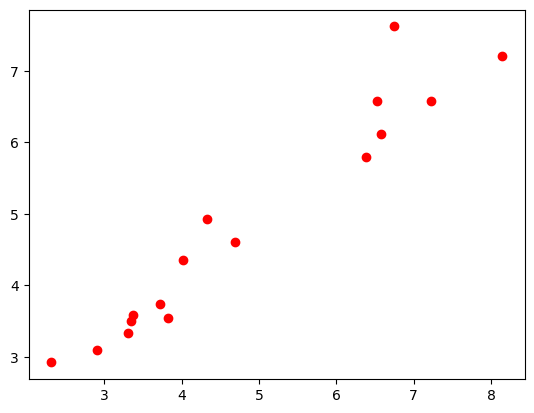

In [13]:
plt.scatter(ytest , modelReg.predict(Xtest) , color = "red")


In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

r2Score = r2_score(ytest,pred)
MAE = mean_absolute_error(ytest,pred)
MSE = mean_squared_error(ytest,pred)
RMSE = sqrt(MSE)

print(" r2_score : ",r2Score)
print(" MAE      : ",MAE)
print(" MSE      : ",MSE)
print(" RMSE     : ",RMSE)


 r2_score :  0.9250061237482194
 MAE      :  0.3775327544136492
 MSE      :  0.22755572943499042
 RMSE     :  0.47702801745284357
